## Problem Statement

### Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Importing libraries

In [285]:
import pandas as pd
import numpy as np
import sklearn

### Import datasets

In [286]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
df.corr() # correlation between numeric variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### As we can see Pclass and Embarked variable is not continous but instead its categorical variables, we will perform one hot coding to these columns

In [288]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [289]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [290]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [291]:
# imputing missing values in embarked column with S as its majorly there
df['Embarked'].fillna('S',inplace=True)

In [292]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark1=pd.get_dummies(df1['Embarked'],drop_first=True)
pc=pd.get_dummies(df['Pclass'],drop_first=True)
pc1=pd.get_dummies(df1['Pclass'],drop_first=True)
df=pd.concat([df,embark,pc],axis=1)
df1=pd.concat([df1,embark1,pc1],axis=1)


In [293]:
col_drop=['PassengerId','Name','Cabin','Ticket','Embarked','Pclass']

df=df.drop(col_drop,axis=1)
df1=df1.drop(col_drop,axis=1)

In [294]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Q,S,2,3
0,0,male,22.0,1,0,7.2500,0,1,0,1
1,1,female,38.0,1,0,71.2833,0,0,0,0
2,1,female,26.0,0,0,7.9250,0,1,0,1
3,1,female,35.0,1,0,53.1000,0,1,0,0
4,0,male,35.0,0,0,8.0500,0,1,0,1


One hot encoding of gender categorical variable

In [295]:
df.info()
df['Sex']=df['Sex'].apply(lambda x:0 if str(x.strip().lower())=='male' else 1)
df1['Sex']=df1['Sex'].apply(lambda x:0 if str(x.strip().lower())=='male' else 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
 8   2         891 non-null    uint8  
 9   3         891 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(4)
memory usage: 45.4+ KB


In [296]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Q,S,2,3
0,0,0,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0
4,0,0,35.0,0,0,8.0500,0,1,0,1


### As there is missing values in Age variable so we will be imputing it with mean values

In [297]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

df[['Age']]=imr.fit_transform(df[['Age']])
df1[['Age']]=imr.transform(df1[['Age']])

In [298]:
df.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,Q,S,2,3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.352413,29.699118,0.523008,0.381594,32.204208,0.086420,0.725028,0.206510,0.551066
std,0.486592,0.477990,13.002015,1.102743,0.806057,49.693429,0.281141,0.446751,0.405028,0.497665
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [299]:
chk_outlier=['Fare','Age']
df[chk_outlier].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Fare,Age
count,891.000000,891.000000
mean,32.204208,29.699118
std,49.693429,13.002015
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,29.699118
75%,31.000000,35.000000
90%,77.958300,47.000000
95%,112.079150,54.000000
99%,249.006220,65.000000


### Outlier treatment for Fare variable

In [300]:
fare99=df['Fare'].quantile(0.99)
df=df[df.Fare<fare99]
y=df['Survived']
df.drop('Survived',axis=1,inplace=True)


### Splitting training and test set

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=100)


In [302]:
#Standardising fare and age variable
sc=StandardScaler()

X_train[['Fare','Age']]=sc.fit_transform(X_train[['Fare','Age']])
X_test[['Fare','Age']]=sc.transform(X_test[['Fare','Age']])


D:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
D:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

#### Keeping dataset and standarising different for Neural networks

In [303]:
## for test NN
sc1=StandardScaler()
df[['Fare','Age']]=sc1.fit_transform(df[['Fare','Age']])

In [304]:
df1[['Fare','Age']]=sc1.transform(df1[['Fare','Age']])

In [305]:
#Survival rate
sum(y)/len(y)*100

37.98185941043084

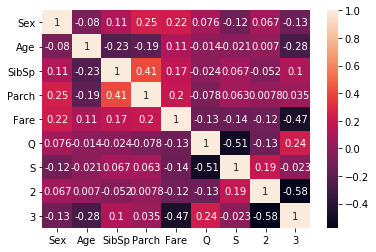

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [307]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Q,S,2,3
86,0,-1.055917,1,3,0.170863,0,1,0,1
794,0,-0.376760,0,0,-0.562789,0,1,0,1
163,0,-0.980455,0,0,-0.541546,0,1,0,1
738,0,-0.022156,0,0,-0.562789,0,1,0,1
718,0,-0.022156,0,0,-0.352101,1,0,0,1


# Logistic regression

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=10)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [309]:
y_pred = logreg.predict(X_test)
metrics.accuracy_score( y_test, y_pred)

0.7471698113207547

## ROC curve

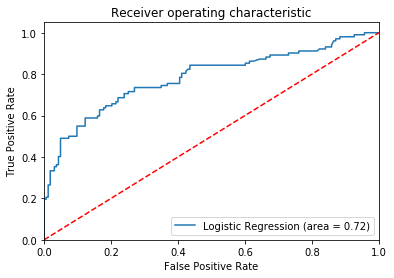

In [310]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SVM model with rbf kernel

In [311]:
from sklearn.svm import SVC
svm_model=SVC(kernel='rbf',C=1,gamma=0.1)
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
metrics.accuracy_score( y_test, y_pred)

0.7886792452830189

# Defining Neural network basic model with just one hidden layer of 16 neurons

In [312]:
import keras
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Conv1D,Flatten,Dropout

In [313]:
model = Sequential()
model.add(Dense(16,activation='relu',kernel_initializer='uniform', input_shape=(df.shape[1],)))

model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 16)                160       
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [314]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [LR]

In [315]:
#X_train=X_train.reshape(1,X_train.shape[0],X_train.shape[1])
model.fit(df, y,batch_size=25,callbacks=callbacks_list,
          epochs=150,
          verbose=1,
          validation_split=0.2)

Train on 705 samples, validate on 177 samples
Epoch 1/150
705/705 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.7177 - val_loss: 0.4568 - val_accuracy: 0.8418
Epoch 2/150
705/705 [==============================] - 0s 267us/step - loss: 0.4957 - accuracy: 0.7972 - val_loss: 0.4213 - val_accuracy: 0.8249
Epoch 3/150
705/705 [==============================] - 0s 201us/step - loss: 0.4851 - accuracy: 0.7773 - val_loss: 0.3990 - val_accuracy: 0.8418
Epoch 4/150
705/705 [==============================] - 0s 187us/step - loss: 0.4707 - accuracy: 0.7915 - val_loss: 0.3813 - val_accuracy: 0.8531
Epoch 5/150
705/705 [==============================] - 0s 187us/step - loss: 0.4562 - accuracy: 0.8057 - val_loss: 0.3793 - val_accuracy: 0.8362
Epoch 6/150
705/705 [==============================] - 0s 171us/step - loss: 0.4652 - accuracy: 0.7872 - val_loss: 0.3690 - val_accuracy: 0.8475
Epoch 7/150
705/705 [==============================] - 0s 199us/step - loss: 0.4638 - 

705/705 [==============================] - 0s 175us/step - loss: 0.4191 - accuracy: 0.8255 - val_loss: 0.3430 - val_accuracy: 0.8814
Epoch 54/150
705/705 [==============================] - 0s 175us/step - loss: 0.4217 - accuracy: 0.8170 - val_loss: 0.3431 - val_accuracy: 0.8814
Epoch 55/150
705/705 [==============================] - 0s 181us/step - loss: 0.4229 - accuracy: 0.8184 - val_loss: 0.3432 - val_accuracy: 0.8814
Epoch 56/150
705/705 [==============================] - 0s 170us/step - loss: 0.4341 - accuracy: 0.8170 - val_loss: 0.3431 - val_accuracy: 0.8814

Epoch 00056: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
Epoch 57/150
705/705 [==============================] - 0s 170us/step - loss: 0.4146 - accuracy: 0.8298 - val_loss: 0.3431 - val_accuracy: 0.8814
Epoch 58/150
705/705 [==============================] - 0s 174us/step - loss: 0.4186 - accuracy: 0.8284 - val_loss: 0.3431 - val_accuracy: 0.8814
Epoch 59/150
705/705 [==============================] - 

705/705 [==============================] - 0s 181us/step - loss: 0.4260 - accuracy: 0.8170 - val_loss: 0.3430 - val_accuracy: 0.8814
Epoch 108/150
705/705 [==============================] - 0s 161us/step - loss: 0.4233 - accuracy: 0.8213 - val_loss: 0.3430 - val_accuracy: 0.8814
Epoch 109/150
705/705 [==============================] - 0s 164us/step - loss: 0.4228 - accuracy: 0.8241 - val_loss: 0.3430 - val_accuracy: 0.8814
Epoch 110/150
705/705 [==============================] - 0s 175us/step - loss: 0.4252 - accuracy: 0.8199 - val_loss: 0.3430 - val_accuracy: 0.8814
Epoch 111/150
705/705 [==============================] - 0s 160us/step - loss: 0.4171 - accuracy: 0.8213 - val_loss: 0.3430 - val_accuracy: 0.8814
Epoch 112/150
705/705 [==============================] - 0s 168us/step - loss: 0.4256 - accuracy: 0.8227 - val_loss: 0.3430 - val_accuracy: 0.8814
Epoch 113/150
705/705 [==============================] - 0s 168us/step - loss: 0.4227 - accuracy: 0.8184 - val_loss: 0.3430 - val_ac

In [316]:
y_pred = model.predict(df1)
y_pred = pd.DataFrame(y_pred)

In [317]:
def binary(x):
    if x > 0.5:
        return 1
    else:
        return 0

y_pred = y_pred[0].apply(binary)

In [318]:
surv=pd.read_csv('test.csv')

In [319]:
submission = pd.DataFrame({
        "PassengerId": surv["PassengerId"],
        "Survived": y_pred
    })
    
submission.to_csv('titanic.csv', index=False)